### linear Regression models

### Boston Housing Data
# Description: Predict the house price in Boston from house details
# Type: Regression
# Dimensions: 506 instances, 14 attributes
# Inputs: Numeric
# Output: Numeric
# UCI Machine Learning Repository

### Use advertising data to build a model to predict sales based on  predictor variables

In [1]:
import pandas                       as     pd
import numpy                        as     np
import scipy.stats                  as     stats

import seaborn                      as     sns
import matplotlib.pyplot            as     plt
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

import astropy.table                as     Table
import statsmodels.api              as     sm
import statsmodels.stats.api        as     sms
from   statsmodels.compat           import lzip
import statsmodels.formula.api      as     smf

from   sklearn.cross_validation     import train_test_split
from   sklearn                      import model_selection

from   sklearn.linear_model         import LinearRegression
from   sklearn.linear_model         import Ridge
from   sklearn.linear_model         import Lasso
from   sklearn.tree                 import DecisionTreeRegressor

from   sklearn.neighbors            import KNeighborsRegressor
from   sklearn.svm                  import SVR

from   sklearn.model_selection      import GridSearchCV
from   sklearn.model_selection      import cross_val_score




from   sklearn.metrics              import mean_squared_error, mean_absolute_error
from   statsmodels.compat           import lzip
from   statsmodels.stats            import diagnostic as diag

from  statsmodels.stats.outliers_influence import variance_inflation_factor

D:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
housing_prices_df       =    pd.read_csv('D:\RRD\Courseware\data/boston_house_prices.csv', header = 0)
print(housing_prices_df.shape)
print(housing_prices_df.head().T)

(506, 14)
                 0          1          2          3          4
CRIM       0.00632    0.02731    0.02729    0.03237    0.06905
ZN        18.00000    0.00000    0.00000    0.00000    0.00000
INDUS      2.31000    7.07000    7.07000    2.18000    2.18000
CHAS       0.00000    0.00000    0.00000    0.00000    0.00000
NOX        0.53800    0.46900    0.46900    0.45800    0.45800
RM         6.57500    6.42100    7.18500    6.99800    7.14700
AGE       65.20000   78.90000   61.10000   45.80000   54.20000
DIS        4.09000    4.96710    4.96710    6.06220    6.06220
RAD        1.00000    2.00000    2.00000    3.00000    3.00000
TAX      296.00000  242.00000  242.00000  222.00000  222.00000
PTRATIO   15.30000   17.80000   17.80000   18.70000   18.70000
B        396.90000  396.90000  392.83000  394.63000  396.90000
LSTAT      4.98000    9.14000    4.03000    2.94000    5.33000
Price     24.00000   21.60000   34.70000   33.40000   36.20000


### Check for missing values

In [4]:
housing_prices_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing_prices_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
housing_prices_df.shape

(506, 14)

### Identify and remove variables of near zero variance

In [7]:
housing_prices_df.var()

CRIM          73.904671
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
Price         84.586724
dtype: float64

In [8]:
housing_prices_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## There are no missing values

## Split the data set into dependent and independent variables, X and y

In [13]:
X          =   housing_prices_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y          =   housing_prices_df['Price']
print(X.shape)                            
print(y.shape) 

(506, 13)
(506,)


In [9]:
import statsmodels.formula.api as smf
model         = smf.ols( 'Price ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX  + PTRATIO + B + LSTAT', \
                        data = housing_prices_df)
results       = model.fit() ## OLS(output, input)

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 01 Jun 2019   Prob (F-statistic):          6.95e-135
Time:                        08:36:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Build the model using statsmodel using the entire data to check assumptions

X_            = sm.add_constant(X)
model         = sm.OLS(y, X).fit()
predictions   = model.predict(X)

## Print the statistics
model.summary()

### 1) No outliers

Firstly we try to get the studentized residuals using get_influence( ). 

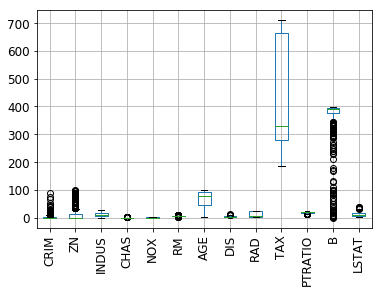

In [14]:
X.boxplot(rot = 90)
plt.show()

In [15]:
influence     = model.get_influence()  
resid_student = influence.resid_studentized_external

AttributeError: 'OLS' object has no attribute 'get_influence'

In [ ]:
all(x > 3 for x in resid_student) 

In [ ]:
resid = pd.concat([X, pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.head()

If the absolute value of studentized residuals is more than 3 then that observation is considered as an outlier and hence should be removed.

In [ ]:
print(X[np.absolute(resid['Studentized Residuals'] > 3)]) 

### There are no outliers

### 2) No multi-collinearity

https://www.listendata.com/2018/01/linear-regression-in-python.html

Multi-collinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.

We can detect multi-collinearity by:
+ By plotting scatter plots between predictor variables to have a visual description of their relationship.
+ By calculating the correlation coefficients between the variables we learn the extent of multi-collinearity in the data.
+ By calculating the Variable Inflation Factor (VIF) for each variable. 
VIF measures how much the variance of an estimated regression coefficients increases if your predictors are correlated.  The higher the value of VIF for the regressor, the more it is highly correlated to other variables.

VIF for a predictor variable is given by $\frac{1}{1 - R^2}$.
Here we take one of the explanatory variables as the target variable and all others as independent variables. So we run a regression between one of those independent variables with remaining independent variables. 

####  Detecting and Removing Multicollinearity 

##### We use the statsmodels library to calculate VIF

In [ ]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)


In [ ]:
X_pure = calculate_vif(X) 

In [ ]:
X_pure.shape 

In [ ]:
X_pure.head()

#### There is no multi-collinearity as their value is below 5

### 3) Constant variance

Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.
Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

The p-value is 0.2993 hence we can say that the residuals have constant variance. 

### 4) No autocorrelation

#### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.

####  Null Hypothesis: Autocorrelation is absent.
#### Alternative Hypothesis: Autocorrelation is present.

In [ ]:
diag.acorr_ljungbox(model.resid, lags = 1) 

Since p-value is 0.8539 thus we can accept the null hypothesis and can say that autocorrelation is absent.

### 5) Normality of the residuals

#### We use Jarque-Bera test  from scipy library to check the normality of residuals.

#### Null Hypothesis: The residuals are normally distributed.

####  Alternative Hypothesis: The residuals are not normally distributed.

In [ ]:
jb_stat, jb_pval = stats.jarque_bera(model.resid)
print('Jarque-Bera test P value is %1.4f' % jb_pval)

In [ ]:
fig     = plt.figure()
ax1     = fig.add_subplot(211)
prob    = stats.probplot(model.resid, dist = stats.norm, plot = ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
plt.show()

In [ ]:
sns.kdeplot(model.resid, shade=True);
plt.show()

## The residuals are normally distributed since the p-value (0.0503) is >  0.05

https://dataunderthehood.com/2018/01/15/box-cox-transformation-with-python/

https://www.listendata.com/2018/01/linear-regression-in-python.html

### 6) Linearity

The residual vs fitted values plot is used to check for constant variance and linearity, and to identify potential outliers in the data.

In [ ]:
residuals  =  model.resid
# Plot the residuals after fitting a linear model
ax         = sns.residplot(y, residuals, lowess = True, color = "g")

ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

The residual plot indicates that the model’s residuals are restricting to mean of zero to a great extent exhibiting linearity.

### Split the data into train and test datasets

* Use the train data to build a model.
* Use the test data to evaluate the model performance.
* Slit the data into 80:20 ratio to create train and test data
* Set a random seed to ensure repeatability of the results

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(X_pure, y, test_size = 0.30, random_state = 123)

In [ ]:
x_train.var()

In [ ]:
df_names      = ['x_train shape', 'x_test shape', 'y_train shape', 'y_test shape']
shapes        = (x_train.shape, x_test.shape,  y_train.shape, y_test.shape)
types         = (type(x_train), type(x_test), type(y_train),type(y_test))
lzip(df_names,shapes, types)

In [ ]:
lm                  = sm.OLS(y_train, x_train, hasconst = False).fit()
print(lm.summary())

The regression equation is given by:

Sales = 3.86577 + 0.09269 * TV + 0.03462 * Radio + 0.01597 * Newspaper -0.000466 * $TV^2$ + 0.0015105 * TV X Radio - 0.0002586 * TV X Newspaper - 9.39196 * $Radio^2$ - 0.0007483 X Radio X Newspaper + 0.0002933 * $Newspaper^2$  + 0.000000081533 * $TV^3$ - 0.0000016885 * $TV^2$ X Radio - 0.00000100052 * $TV^2$ X Newspaper - 0.0000023998 * $Radio^2$ X TV - 0.00000198309 * $TV$ * $Radio$ * $Newspaper$ - 0.000000332817 * $Newspaper^2$ * TV - 0.00000907886 * $Radio^3$ + 0.0000097386 * $Radio^2$ * Newspaper + 0.0000052069 * $Newspaper^2$ X Radio - 0.000003027 * $Newspaper^3$ 

### Model evaluation

We will evaluate our model using RMSE, MAPE and R2-score.

### Prediction Accuracy

Prediction error or residuals is the difference between the predicted target variable values and the actual target variable vaues.

Most popular measure to evaluate the model performance is Root Mean Square Error (RMSE) which is the arithmatic mean of the sum of the residuals.

The model with low RMSE is the best model among many other models.

In [ ]:
# model evaluation for training set

y_train_predict       = lm.predict(x_train)

rmse_train            = np.sqrt(mean_squared_error(y_train, y_train_predict))
mape_train            = mean_absolute_percentage_error(y_train, y_train_predict)

print("The model performance for training set")

print("--------------------------------------")

print('RMSE is {}'.format(rmse_train))

print('MAPE is {}'.format(mape_train))
print('R square is %1.3f' % lm.rsquared_adj)



In [ ]:
print("\n")

print("The model performance for testing set")

print("--------------------------------------")

# model evaluation for testing set
x_test_                  =   sm.add_constant(x_test) 
y_test_predict           =   lm.predict(x_test)
rmse_test                =   (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mape_test                =   mean_absolute_percentage_error(y_test, y_test_predict)

print('RMSE is {}'.format(rmse_test))
print('MAPE is {}'.format(mape_test))

Let us see if ridge or lasso regression is better.

### Ridge Regression

For ridge regression, we introduce GridSearchCV, which allow us to automatically perform 5-fold cross-validation with a range of different regularization parameters in order to find the optimal value of alpha.
Ref: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8

In [ ]:
ridge    =  Ridge()

In [ ]:
param_dict      =  {'alpha' : [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 20, 30]}
ridge_regressor =  GridSearchCV(ridge, param_dict, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x_train, y_train)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

In [ ]:
clf = Ridge(alpha = 30,  fit_intercept = False, random_state = 12345)
clf.fit(x_train, y_train)

## Get the coefficients of the Ridge model

In [ ]:
coef_dict_ridge = {}
for coef, feat in zip(clf.coef_, x_train.columns):
    coef_dict_ridge[feat] = coef
print(coef_dict_ridge)

In [ ]:
rmse_train_rr    = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = clf.predict(x_train))))
mape_train_rr    = mean_absolute_percentage_error(y_train,y_pred = clf.predict(x_train))

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE    is {}'.format(rmse_train_rr))
print('MAPE    is {}'.format(mape_train_rr))
print('Rsquare is {}'.format(clf.score(x_train, y_train)))

In [ ]:
rmse_test_rr    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = clf.predict(x_test))))
mape_test_rr    = mean_absolute_percentage_error(y_test, y_pred = clf.predict(x_test))

print("\n")
print("The model performance for testing set")
print("--------------------------------------")

print('RMSE is {}'.format(rmse_test_rr ))
print('MAPE is {}'.format(mape_test_rr ))

In [ ]:
lasso                      =  Lasso()

In [ ]:
param_dict       =  {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 20]}
lasso_regressor  =  GridSearchCV(lasso, param_dict, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x_train, y_train)

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

In [ ]:
clf1 = Lasso(alpha = 0.01)
clf1.fit(x_train, y_train)
print('Rsquare is {}'.format(clf1.score(x_train, y_train)))

### Get the coefficients of the Lasso model

In [ ]:
coef_dict_lasso = {}
for coef, feat in zip(clf1.coef_, x_train.columns):
    coef_dict_lasso[feat] = coef
print(coef_dict_lasso)

In [ ]:
rmse_train_lasso    = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = clf1.predict(x_train))))
mape_train_lasso    = mean_absolute_percentage_error(y_train,y_pred = clf1.predict(x_train))

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_lasso ))
print('MAPE is {}'.format(mape_train_lasso ))

In [ ]:
rmse_test_lasso    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = clf1.predict(x_test))))
mape_test_lasso    = mean_absolute_percentage_error(y_test, y_pred = clf1.predict(x_test))

print("\n")
print("The model performance for testing set")
print("--------------------------------------")

print('RMSE is {}'.format(rmse_test_lasso ))
print('MAPE is {}'.format(mape_test_lasso ))

### Decision Trees (CART)

Decision trees or the Classification and Regression Trees (CART as they are known) use the training data to select the best points to split the data in order to minimize a cost metric. The default cost metric for regression decision trees is the mean squared error, specified in the criterion parameter.

You can create a CART model for regression using the DecisionTreeRegressor class.

For more details, refer https://machinelearningmastery.com/spot-check-regression-machine-learning-algorithms-python-scikit-learn/

In [ ]:
X                      =   x_train
Y                      =   y_train
seed                   =   12345

## Create and fit the model

kfold                  = model_selection.KFold(n_splits = 10, random_state = seed)
model                  = DecisionTreeRegressor()
model.fit(x_train, y_train)  

In [ ]:
### Predict from the model for training data

y_pred      =  model.predict(x_train)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df          =  pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
print(df.head(5).T)

In [ ]:
rmse_train_CART    = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))))
mape_train_CART    = mean_absolute_percentage_error(y_train,y_pred = model.predict(x_train))
score              = model.score(x_train, y_train)


print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_CART))
print('MAPE is {}'.format(mape_train_CART))
print('R Square is {}'.format(score))


In [ ]:
coef_dict_CART = {}
for coef, feat in zip(model.coef_, x_train.columns):
    coef_dict_CART[feat] = coef
print(coef_dict_CART)

In [ ]:
### Predict from the model for testing data

y_pred      =  model.predict(x_test)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df1          =  pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df1.head(5).T)

In [ ]:
rmse_test_CART    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))))
mape_test_CART    = mean_absolute_percentage_error(y_test, y_pred = model.predict(x_test))

print("\n")
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test_CART))
print('MAPE is {}'.format(mape_test_CART))

http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
https://theprofessionalspoint.blogspot.com/2019/02/implement-decision-tree-algorithm-in_22.html

### K-Nearest Neighbors (or KNN)

K-Nearest Neighbors (or KNN) locates the K most similar instances in the training dataset for a new data instance. From the K neighbors, a mean or median output variable is taken as the prediction. Of note is the distance metric used (the metric argument). The Minkowski distance is used by default, which is a generalization of both the Euclidean distance (used when all inputs have the same scale) and Manhattan distance (for when the scales of the input variables differ).
You can construct a KNN model for regression using the KNeighborsRegressor class.

In [ ]:
seed                   =  12345
kfold                  =  model_selection.KFold(n_splits = 10, random_state = seed)
model                  =  KNeighborsRegressor()
scoring                =  'neg_mean_squared_error'
model.fit(x_train, y_train)  

In [ ]:
### Predict from the model for training data

y_pred      =  model.predict(x_train)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df          =  pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
print(df.head(5).T)

In [ ]:
rmse_train_KNN     = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))))
mape_train_KNN     = mean_absolute_percentage_error(y_train,y_pred = model.predict(x_train))
score              = model.score(x_train, y_train)


print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_KNN))
print('MAPE is {}'.format(mape_train_KNN))
print('R Square is {}'.format(score))

In [ ]:
### Predict from the model for testing data

y_pred      =  model.predict(x_test)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df1          =  pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df1.head(5).T)

In [ ]:
rmse_test_KNN    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))))
mape_test_KNN    = mean_absolute_percentage_error(y_test, y_pred = model.predict(x_test))

print("\n")
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test_KNN ))
print('MAPE is {}'.format(mape_test_KNN))

### Support Vector Machines - Regression

Support Vector Machines (SVM) were developed for binary classification. The technique has been extended for the prediction real-valued problems called Support Vector Regression (SVR). Like the classification example, SVR is built upon the LIBSVM library.
You can create an SVM model for regression using the SVR class.

In [ ]:
seed                =  12345
kfold               =  model_selection.KFold(n_splits=10, random_state=seed)
model               =  SVR()
scoring             =  'neg_mean_squared_error'

model_selection.cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
model.fit(x_train, y_train)  

In [ ]:
### Predict from the model for training data

y_pred      =  model.predict(x_train)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df          =  pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})  
print(df.head(5).T)

In [ ]:
rmse_train_SVR     = (np.sqrt(mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))))
mape_train_SVR     = mean_absolute_percentage_error(y_train,y_pred = model.predict(x_train))
score              = model.score(x_train, y_train)

print("\n")
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_SVR ))
print('MAPE is {}'.format(mape_train_SVR))
print('R Square is {}'.format(score))

In [ ]:
### Predict from the model for testing data

y_pred      =  model.predict(x_test)

print('Type of y_pred is %s' % type(y_pred))

print('\n Compare the difference between the actual and predicted values.')

df1          =  pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df1.head(5).T)

In [ ]:
rmse_test_SVR    = (np.sqrt(mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))))
mape_test_SVR    = mean_absolute_percentage_error(y_test, y_pred = model.predict(x_test))

print("\n")
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test_SVR ))
print('MAPE is {}'.format(mape_test_SVR))